In [5]:
from constants import pubtator_output
import pandas as pd
import numpy as np  

data = pd.read_csv(pubtator_output)

print("Data shape: ", data.shape)

all_genes = data.tags.to_numpy().tolist()

all_genes = [tag.split(",") for tag in all_genes]

all_genes = [gene for sublist in all_genes for gene in sublist]
print(all_genes[0:10])

unique_genes, unique_counts = np.unique(all_genes, return_counts=True)

print("Number of genes initially found: ", len(unique_genes))

Data shape:  (43916, 4)
['Gene_1294', 'Gene_7039', 'Gene_7039', 'Gene_12836', 'Gene_1294', 'Gene_100133205', 'Gene_100133205', 'Gene_100133205', 'Gene_100133205', 'Gene_100133205']
Number of genes initially found:  15229


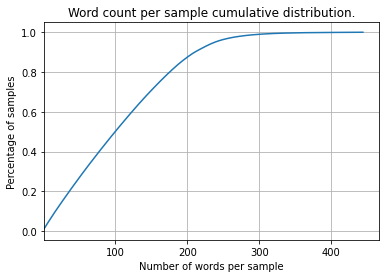

In [7]:

ax = (data
 .text
 .apply(lambda x: x.split())
 .apply(len).value_counts(normalize=True)
 .cumsum()
 .reset_index()
 .drop('index',axis=1)
 .plot(legend=False, logx=False)
);


ax.set_xlabel('Number of words per sample')
ax.set_ylabel('Percentage of samples')
ax.set_title('Word count per sample cumulative distribution.')

ax.grid()

ax.set_xlim(1)

fig = ax.get_figure()

Average number of tags per sample:  10.24726751070225


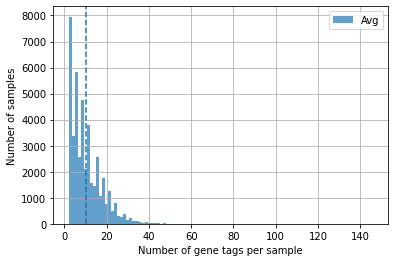

In [13]:
avg_tags = data.n_tags.mean()
print("Average number of tags per sample: ",avg_tags)

ax = (data
       .n_tags
       .plot
       .hist(bins=100,logx=False, alpha = 0.7)
);

ax.set_xlabel('Number of gene tags per sample')
ax.set_ylabel('Number of samples')
ax.axvline(avg_tags, linestyle='--', color='C0')
ax.legend(['Avg'])
#ax.set_xlim([0,60000])
#ax.set_xlim(left=10e0)
ax.grid()

fig = ax.get_figure()

Avg number of words per sample:  128.38940249567355


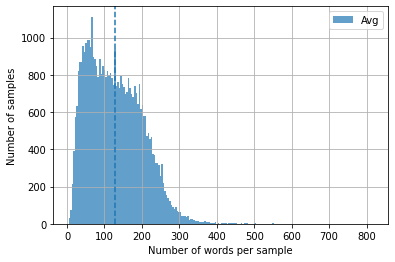

In [18]:

avg_words = data['text'].apply(lambda x: x.split()).str.len().mean()
print("Avg number of words per sample: ", avg_words)

ax = (data
       .text
       .apply(lambda x: x.split())
       .apply(len)
       .plot
       .hist(bins=200,logx=False, alpha = 0.7)
);

ax.set_xlabel('Number of words per sample')
ax.set_ylabel('Number of samples')
ax.axvline(avg_words, linestyle='--', color='C0')
ax.legend(['Avg'])
#ax.set_xlim([0,60000])
#ax.set_xlim(left=10e0)
ax.grid()

fig = ax.get_figure()
